In [2]:
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


here I found our target vairable have the integer valeue or continous value, means our data has the regreesion problem
 but it can be the classification problem also beacause target column has the classes like 3,4,5,6etc

In [5]:
df.shape
# data has 1599 row and 12 columns

(1599, 12)

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
## 5 quality wine has 681 row and 6 quality wine has 638 row,7 quality wine has 199 row,4 quality wine has 53 row
# 8 quality wine has 18 row, 3 quality wine has 10 row
####### because its a regression problem so we do not need to valance the class

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


*mean is greater than median in all columns
*std is high in free sulfer dioxide and toal sulfer dioxide columns
*there is a large differnce in 75% and max value in fixed acidity, free sulfur dioxoide and total sulfur dioxide it means outliers are present in data 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

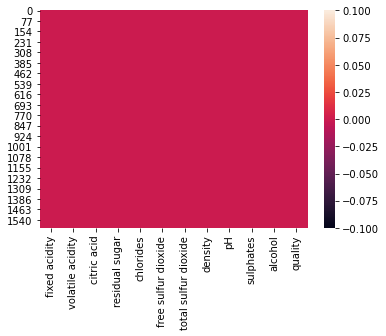

In [12]:
sns.heatmap(df.isnull())

no null value is present in tha data set

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

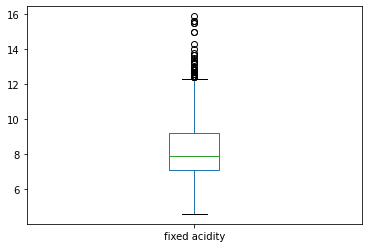

In [14]:
df['fixed acidity'].plot.box()

ouliers are present in this column

<AxesSubplot:>

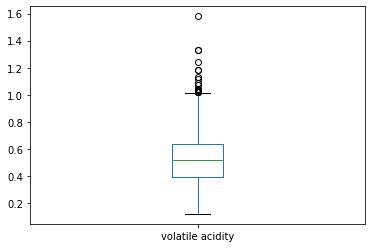

In [15]:
df['volatile acidity'].plot.box()

some outlier is present in the volatile acidity

<AxesSubplot:>

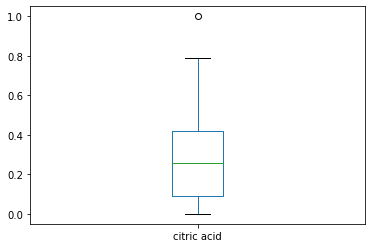

In [16]:
df['citric acid'].plot.box()

<AxesSubplot:>

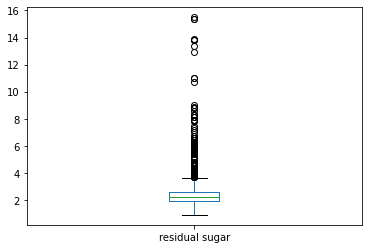

In [17]:
df['residual sugar'].plot.box()

<AxesSubplot:>

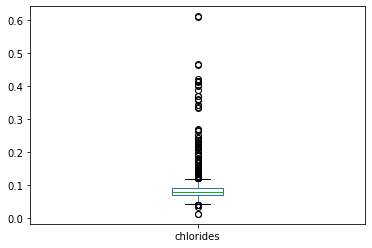

In [18]:
df['chlorides'].plot.box()

<AxesSubplot:>

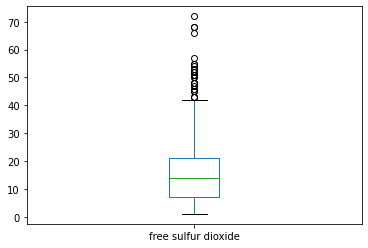

In [19]:
df['free sulfur dioxide'].plot.box()

<AxesSubplot:>

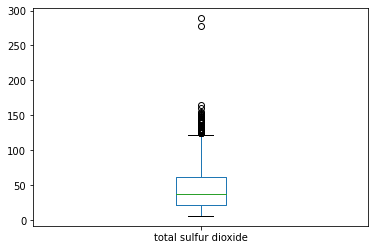

In [20]:
df['total sulfur dioxide'].plot.box()

<AxesSubplot:>

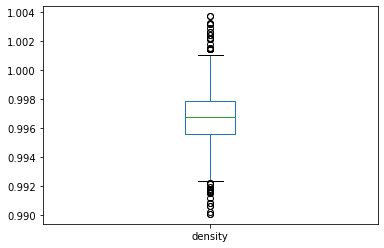

In [21]:
df['density'].plot.box()

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

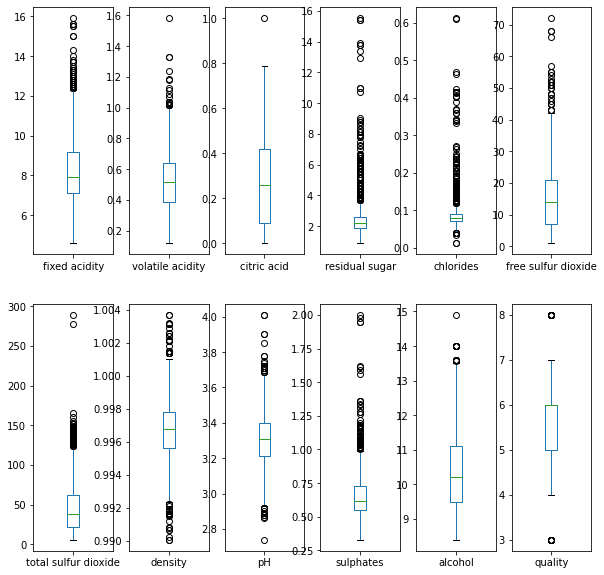

In [22]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize =(10,10))

it shows outliers are present in the dataset

# now we check skewness in the dataset by distplot

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

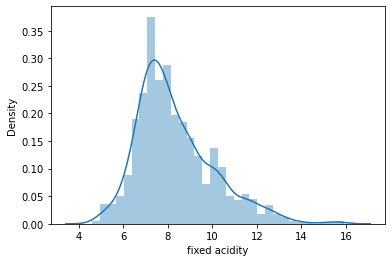

In [23]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

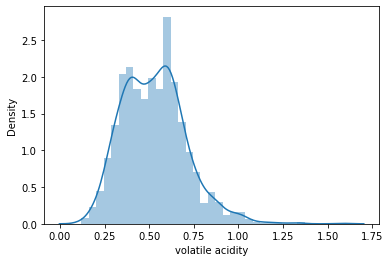

In [24]:
sns.distplot(df['volatile acidity'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

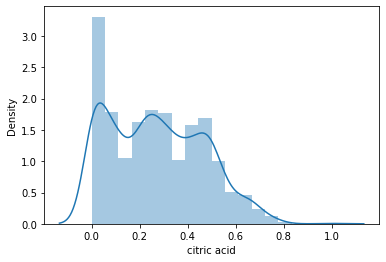

In [25]:
sns.distplot(df['citric acid'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

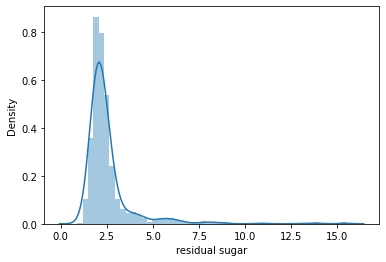

In [26]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

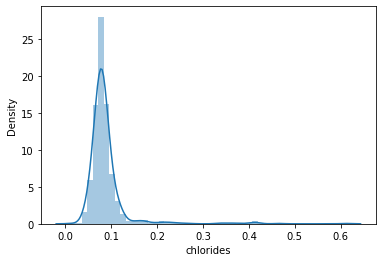

In [27]:
sns.distplot(df['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

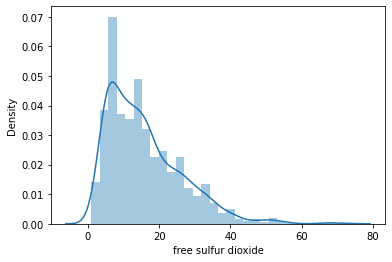

In [28]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

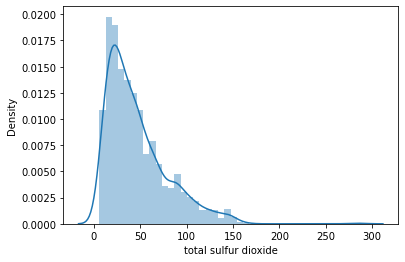

In [29]:
sns.distplot(df['total sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Density'>

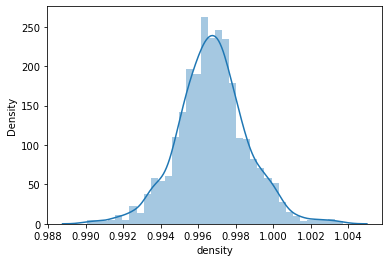

In [30]:
sns.distplot(df['density'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

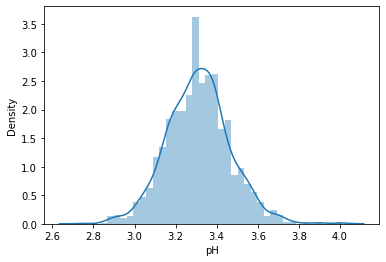

In [31]:
sns.distplot(df['pH'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

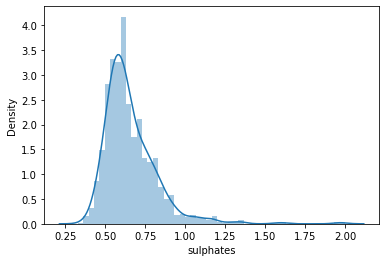

In [32]:
sns.distplot(df['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

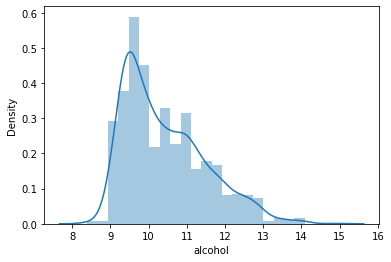

In [33]:
sns.distplot(df['alcohol'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

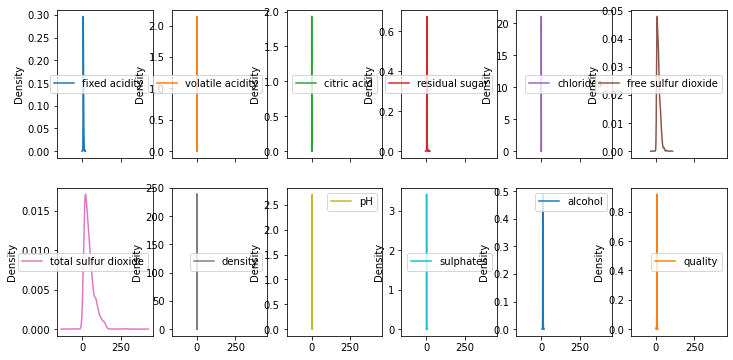

In [34]:
df.plot(kind='kde',subplots = True,layout=(2,6),figsize=(12,6))

In [35]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [36]:
dfcor = df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

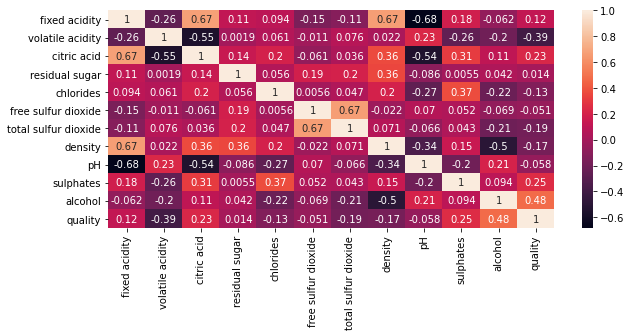

In [37]:
plt.figure(figsize=(10,4))
sns.heatmap(dfcor,annot=True)

volatile acidity shows the highest negative correlation to the quality,
alcohol shows the very strong possitive realtion with quality
now I drop the volatile acidity

In [38]:
df.drop('volatile acidity',axis=1,inplace=True)

In [39]:
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


now we remove the outliers using z score method

In [40]:
df.skew()

fixed acidity           0.982751
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [41]:
#data = df.iloc[:,:-1]

In [42]:
#data

In [43]:
#data.head()

In [44]:
#data.skew()

In [45]:
df.shape

(1599, 11)

In [46]:
from scipy.stats import zscore
import numpy as np

In [47]:
dfContCols = df[["fixed acidity","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
z = np.abs(zscore(dfContCols))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
          57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
         109,  142,  144,  147,  151,  151,  151,  163,  164,  169,  169,
         181,  226,  226,  240,  243,  244,  258,  258,  274,  281,  291,
         324,  325,  339,  340,  347,  354,  374,  381,  391,  396,  396,
         400,  400,  442,  442,  451,  467,  480,  480,  494,  515,  544,
         554,  554,  555,  555,  557,  557,  568,  584,  588,  591,  595,
         608,  614,  636,  639,  649,  649,  651,  652,  652,  652,  672,
         684,  692,  692,  695,  723,  730,  754,  776,  777,  795,  821,
         836,  837,  889,  911,  917,  923,  925,  926,  982, 1017, 1018,
        1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114,
        1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260,
        1269, 1269, 1270, 1270, 1288, 1289, 1295, 1296, 1300, 1316, 1319,
        1319, 1321, 1358, 1367, 1370, 

In [48]:
#data.shape

In [49]:
df_new = df[(z<3).all(axis=1)]

In [50]:
df_new.shape

(1467, 11)

In [51]:
df_new['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [52]:
df_new['quality'].value_counts()

5    621
6    586
7    185
4     50
8     16
3      9
Name: quality, dtype: int64

In [53]:
(1599-1467)/1599*100

8.25515947467167

ok now its fine there is no problem beacause our data less is not too much so here we can go through the new data

In [54]:
df_new.skew()

fixed acidity           0.826195
citric acid             0.300159
residual sugar          2.445124
chlorides               2.307437
free sulfur dioxide     0.874858
total sulfur dioxide    1.186170
density                 0.062331
pH                      0.109001
sulphates               0.891376
alcohol                 0.752251
quality                 0.206264
dtype: float64

In [55]:
df_new.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
from scipy.stats import skew

fixed acidity
0.8253497150223571


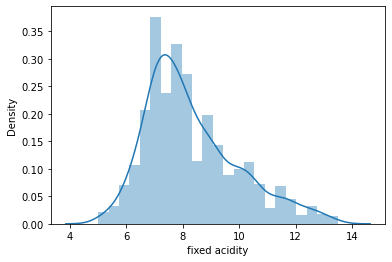

citric acid
0.2998517714972842


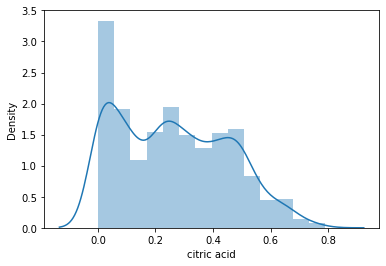

residual sugar
2.442622862572118


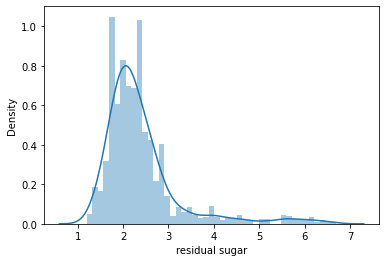

chlorides
2.3050765749469315


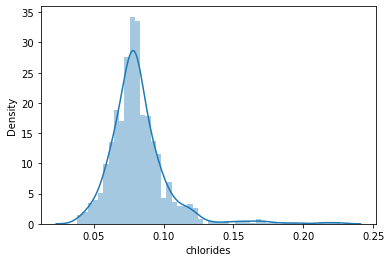

free sulfur dioxide
0.8739629759691739


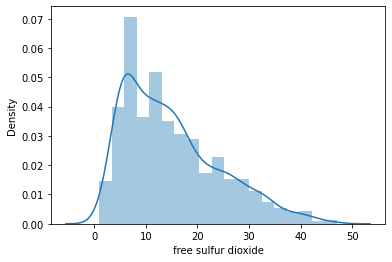

total sulfur dioxide
1.1849565107477047


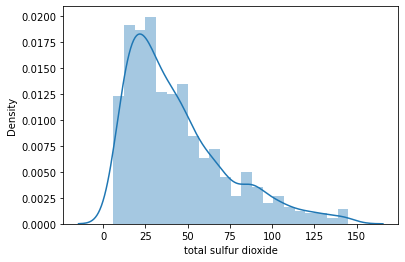

density
0.06226729501183716


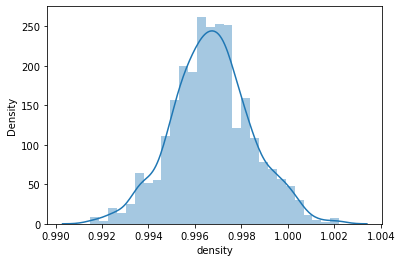

pH
0.10888939076522995


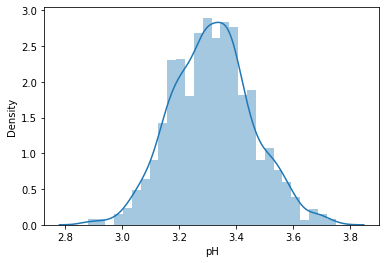

sulphates
0.8904639954207211


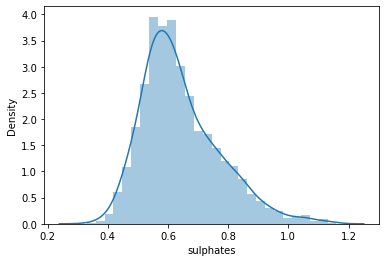

alcohol
0.7514816321145156


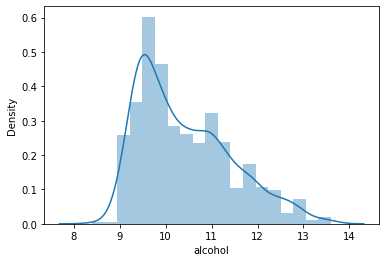

quality
0.2060534187148393


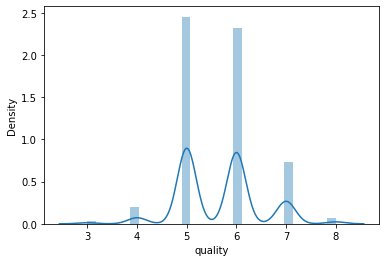

In [57]:
for col in df_new:
    print(col)
    print(skew(df_new[col]))
    
    plt.figure()
    sns.distplot(df_new[col])
    plt.show()
    

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

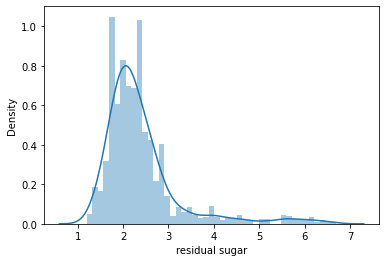

In [58]:
sns.distplot(df_new['residual sugar'])

In [59]:
df_new['residual sugar'].skew()

2.4451236994950585

In [60]:
for col in df_new:
    if df_new.skew().loc[col]>0.55:
        df_new[col] = np.log1p(df_new[col])

In [61]:
df_new

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.128232,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,2.341806,5
1,2.174752,0.00,1.280934,0.093490,3.258097,4.219508,0.99680,3.20,0.518794,2.379546,5
2,2.174752,0.04,1.193922,0.088011,2.772589,4.007333,0.99700,3.26,0.500775,2.379546,5
3,2.501436,0.56,1.064711,0.072321,2.890372,4.110874,0.99800,3.16,0.457425,2.379546,6
4,2.128232,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,2.341806,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.974081,0.08,1.098612,0.086178,3.496508,3.806662,0.99490,3.45,0.457425,2.442347,5
1595,1.931521,0.10,1.163151,0.060154,3.688879,3.951244,0.99512,3.52,0.565314,2.501436,6
1596,1.987874,0.13,1.193922,0.073250,3.401197,3.713572,0.99574,3.42,0.559616,2.484907,6
1597,1.931521,0.12,1.098612,0.072321,3.496508,3.806662,0.99547,3.57,0.536493,2.415914,5


In [62]:
df_new['quality'].value_counts()

5    621
6    586
7    185
4     50
8     16
3      9
Name: quality, dtype: int64

In [63]:
df_new.skew()

fixed acidity           0.429793
citric acid             0.300159
residual sugar          1.539293
chlorides               2.113964
free sulfur dioxide    -0.160584
total sulfur dioxide   -0.048985
density                 0.062331
pH                      0.109001
sulphates               0.667261
alcohol                 0.596861
quality                 0.206264
dtype: float64

fixed acidity
0.42935316371045057


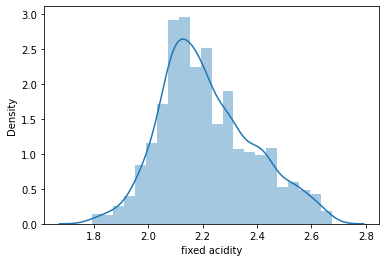

citric acid
0.2998517714972842


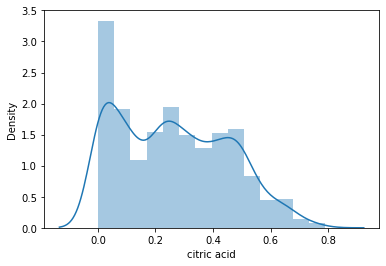

residual sugar
1.53771839619983


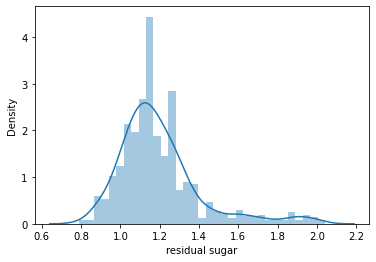

chlorides
2.1118021462107297


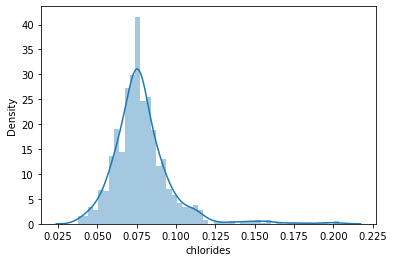

free sulfur dioxide
-0.16041993970853033


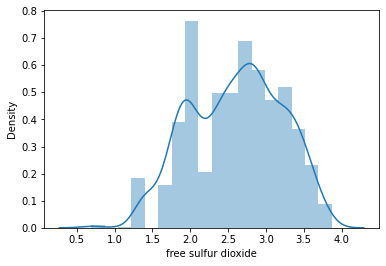

total sulfur dioxide
-0.04893468321442115


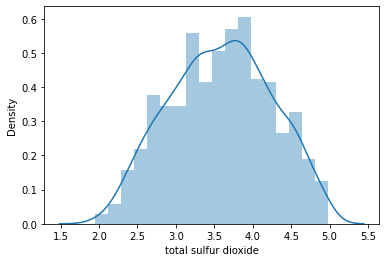

density
0.06226729501183716


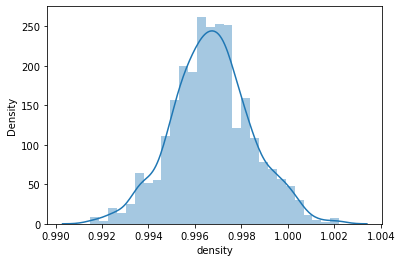

pH
0.10888939076522995


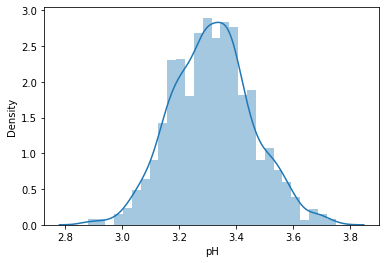

sulphates
0.666579024032515


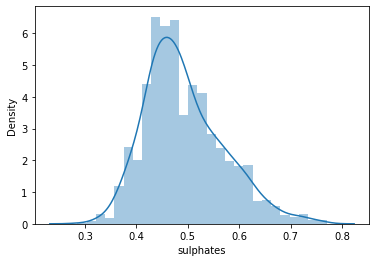

alcohol
0.5962508011835359


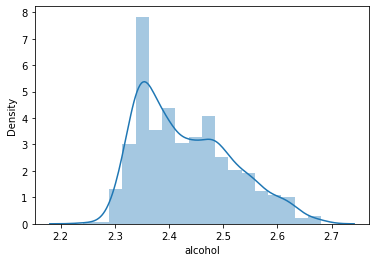

quality
0.2060534187148393


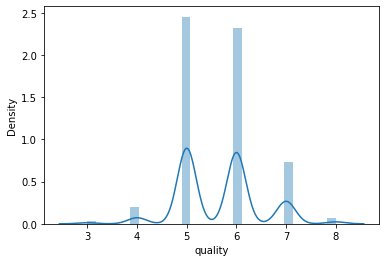

In [64]:
for col in df_new:
    print(col)
    print(skew(df_new[col]))
    
    plt.figure()
    sns.distplot(df_new[col])
    plt.show()
    
        

In [65]:
from scipy.stats import boxcox

In [66]:
df_new['chlorides'] =boxcox(df_new['chlorides'],0)

In [67]:
df_new['chlorides'].skew()

0.49385031622595077

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

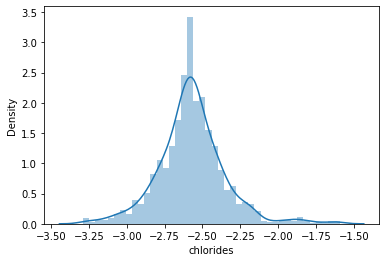

In [68]:
sns.distplot(df_new['chlorides'])

In [69]:
df_new.skew()

fixed acidity           0.429793
citric acid             0.300159
residual sugar          1.539293
chlorides               0.493850
free sulfur dioxide    -0.160584
total sulfur dioxide   -0.048985
density                 0.062331
pH                      0.109001
sulphates               0.667261
alcohol                 0.596861
quality                 0.206264
dtype: float64

In [70]:
df_new['residual sugar'] =boxcox(df_new['residual sugar'],0)

In [71]:
df_new['residual sugar'].skew()

0.8986894253912437

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

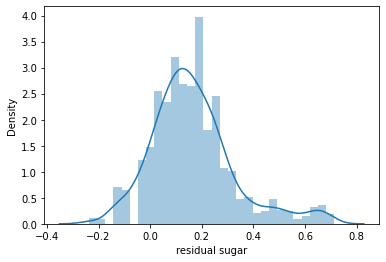

In [72]:
sns.distplot(df_new['residual sugar'])

In [73]:
df_new.skew()

fixed acidity           0.429793
citric acid             0.300159
residual sugar          0.898689
chlorides               0.493850
free sulfur dioxide    -0.160584
total sulfur dioxide   -0.048985
density                 0.062331
pH                      0.109001
sulphates               0.667261
alcohol                 0.596861
quality                 0.206264
dtype: float64

In [74]:
df_new['sulphates']=boxcox(df_new['sulphates'],0)

In [75]:
df_new['sulphates'].skew()

0.24359854081230808

In [76]:
df_new['alcohol']=boxcox(df_new['alcohol'],0)

In [77]:
df_new['alcohol'].skew()

0.53639727606782

In [78]:
df_new.skew()

fixed acidity           0.429793
citric acid             0.300159
residual sugar          0.898689
chlorides               0.493850
free sulfur dioxide    -0.160584
total sulfur dioxide   -0.048985
density                 0.062331
pH                      0.109001
sulphates               0.243599
alcohol                 0.536397
quality                 0.206264
dtype: float64

In [79]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1467 non-null   float64
 1   citric acid           1467 non-null   float64
 2   residual sugar        1467 non-null   float64
 3   chlorides             1467 non-null   float64
 4   free sulfur dioxide   1467 non-null   float64
 5   total sulfur dioxide  1467 non-null   float64
 6   density               1467 non-null   float64
 7   pH                    1467 non-null   float64
 8   sulphates             1467 non-null   float64
 9   alcohol               1467 non-null   float64
 10  quality               1467 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


In [80]:
x = df_new.iloc[:,0:-1]

In [81]:
x.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.128232,0.00,0.062703,-2.613871,2.484907,3.555348,0.9978,3.51,-0.810387,0.850922
1,2.174752,0.00,0.247589,-2.369897,3.258097,4.219508,0.9968,3.20,-0.656249,0.866910
2,2.174752,0.04,0.177244,-2.430295,2.772589,4.007333,0.9970,3.26,-0.691598,0.866910
3,2.501436,0.56,0.062703,-2.626645,2.890372,4.110874,0.9980,3.16,-0.782143,0.866910
4,2.128232,0.00,0.062703,-2.613871,2.484907,3.555348,0.9978,3.51,-0.810387,0.850922


In [82]:
y = df_new.iloc[:,-1]

In [83]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [84]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [85]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [86]:
x.shape[1]

10

In [87]:
import statsmodels.api as sm

In [88]:
from scipy import stats

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
vif= pd.DataFrame()
vif["features"]=x.columns
vif["VIF FACTOR"] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
print(vif)

               features   VIF FACTOR
0         fixed acidity   585.846856
1           citric acid     6.521830
2        residual sugar     2.374908
3             chlorides   157.238442
4   free sulfur dioxide    54.761077
5  total sulfur dioxide    93.992218
6               density  3948.788095
7                    pH  1276.996537
8             sulphates    27.822066
9               alcohol   884.705196


In [91]:
y.value_counts()

5    621
6    586
7    185
4     50
8     16
3      9
Name: quality, dtype: int64

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
SM = SMOTE()
x,y = SM.fit_resample(x, y)

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=35)

In [95]:
y.value_counts()

4    621
6    621
8    621
3    621
5    621
7    621
Name: quality, dtype: int64

In [96]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [97]:
svc= SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.4745308310991957
[[95  6  1 22  0  0]
 [24 60 32 13  1  2]
 [12 23 66 18  3  9]
 [10 24 19 30 22 16]
 [ 7  7  8 12 19 53]
 [ 0  0  6 11 31 84]]
              precision    recall  f1-score   support

           3       0.64      0.77      0.70       124
           4       0.50      0.45      0.48       132
           5       0.50      0.50      0.50       131
           6       0.28      0.25      0.26       121
           7       0.25      0.18      0.21       106
           8       0.51      0.64      0.57       132

    accuracy                           0.47       746
   macro avg       0.45      0.46      0.45       746
weighted avg       0.46      0.47      0.46       746



In [98]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8109919571045576
[[120   1   1   2   0   0]
 [  7 105  15   4   1   0]
 [  5   6  89  28   3   0]
 [  1   7  28  73   9   3]
 [  0   1   5   7  90   3]
 [  0   0   0   1   3 128]]
              precision    recall  f1-score   support

           3       0.90      0.97      0.93       124
           4       0.88      0.80      0.83       132
           5       0.64      0.68      0.66       131
           6       0.63      0.60      0.62       121
           7       0.85      0.85      0.85       106
           8       0.96      0.97      0.96       132

    accuracy                           0.81       746
   macro avg       0.81      0.81      0.81       746
weighted avg       0.81      0.81      0.81       746



In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7388682368605718


In [101]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.46107382550335574


In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))


0.7613941018766756
[[124   0   0   0   0   0]
 [  4 125   0   3   0   0]
 [  7  25  64  25   7   3]
 [  7  19  23  35  29   8]
 [  0   2   3   3  93   5]
 [  0   0   0   2   3 127]]
              precision    recall  f1-score   support

           3       0.87      1.00      0.93       124
           4       0.73      0.95      0.83       132
           5       0.71      0.49      0.58       131
           6       0.51      0.29      0.37       121
           7       0.70      0.88      0.78       106
           8       0.89      0.96      0.92       132

    accuracy                           0.76       746
   macro avg       0.74      0.76      0.74       746
weighted avg       0.74      0.76      0.74       746



In [104]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.7356374039620708


In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rfc = RandomForestClassifier(n_estimators=40)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.871313672922252
[[124   0   0   0   0   0]
 [  2 122   6   2   0   0]
 [  2   7 101  20   1   0]
 [  1   8  16  76  19   1]
 [  0   0   3   5  98   0]
 [  0   0   0   0   3 129]]
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       124
           4       0.89      0.92      0.91       132
           5       0.80      0.77      0.79       131
           6       0.74      0.63      0.68       121
           7       0.81      0.92      0.86       106
           8       0.99      0.98      0.98       132

    accuracy                           0.87       746
   macro avg       0.87      0.87      0.87       746
weighted avg       0.87      0.87      0.87       746



In [107]:
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8013973406265181


In [108]:
from sklearn.naive_bayes import GaussianNB

In [109]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb =gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))


0.5402144772117963


In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameter = {'max_depth':np.arange(2,10),
              'criterion':['gini','entropy'],
               'splitter':['best','random'],
            'max_features':['auto','sqrt','log2']}

In [112]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [113]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [114]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'splitter': 'best'}